<a href="https://colab.research.google.com/github/dpnolan/taba/blob/main/tata_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis for the Irish airports departures data

In [ ]:
# Start a new R notebook in Jupyter using URL https://colab.research.google.com/notebook#create=true&language=r 

In [ ]:
install.packages('tseries')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’




In [ ]:
library('tseries')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Import the departures data

In [ ]:
departs<-c(
732.40,
757.20,
919.60,
709.50,
977.90,
1183.10,
1269.50,
1250.50,
1078.70,
1045.80,
800.70,
700.50,
729.60,
724.00,
869.60,
987.90,
1084.20,
1198.50,
1288.00,
1247.80,
1070.30,
978.70,
774.30,
754.30,
700.50,
706.90,
874.80,
972.60,
1089.60,
1222.30,
1278.80,
1244.20,
1122.10,
1041.30,
804.10,
782.40,
709.50,
698.70,
937.30,
972.30,
1160.20,
1292.10,
1336.70,
1314.30,
1144.20,
1079.90,
836.50,
832.70,
764.70,
742.80,
892.50,
1112.70,
1223.80,
1361.80,
1418.40,
1403.90,
1231.20,
1179.90,
925.40,
912.30,
861.50,
850.30,
1063.40,
1178.50,
1359.90,
1541.70,
1600.00,
1552.50,
1368.80,
1339.80,
1055.40,
1018.60,
981.70,
989.00,
1236.50,
1282.80,
1475.70,
1684.60,
1738.70,
1688.90,
1498.60,
1462.30,
1134.90,
1145.30,
1057.10,
1020.20,
1227.70,
1438.70,
1530.60,
1761.50,
1828.60,
1778.10,
1583.60,
1505.90,
1203.50,
1204.30,
1115.60,
1047.30,
1294.60,
1473.80,
1687.40,
1879.00,
1932.00,
1865.20,
1691.00,
1624.90,
1284.00,
1285.70,
1169.30,
1139.10,
1375.40,
1622.60,
1744.00,
1933.40,
2006.90,
1967.50,
1757.40,
1660.10,
1279.10,
1320.20,
1183.50,
1161.90,
575.60,
12.80,
24.70,
53.10,
239.00,
275.50,
203.50,
143.70,
85.10,
156.10,
104.10,
46.70,
57.50,
61.50,
82.40,
174.70,
384.00,
673.00,
716.60,
821.20,
749.70,
687.90,
528.40,
751.90,
1014.70,
1395.10,
1499.10,
1704.00,
1788.20,
1749.60,
1592.20
)

# New Section

In [ ]:
ts_departs<-ts(departs,start=c(2010,1),frequency=12)
ts_departs

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2


In [ ]:
# Check the basic definition terms are correct
start(ts_departs)
end(ts_departs)
frequency(ts_departs)

[1] 2010    1

[1] 2022    9

[1] 12

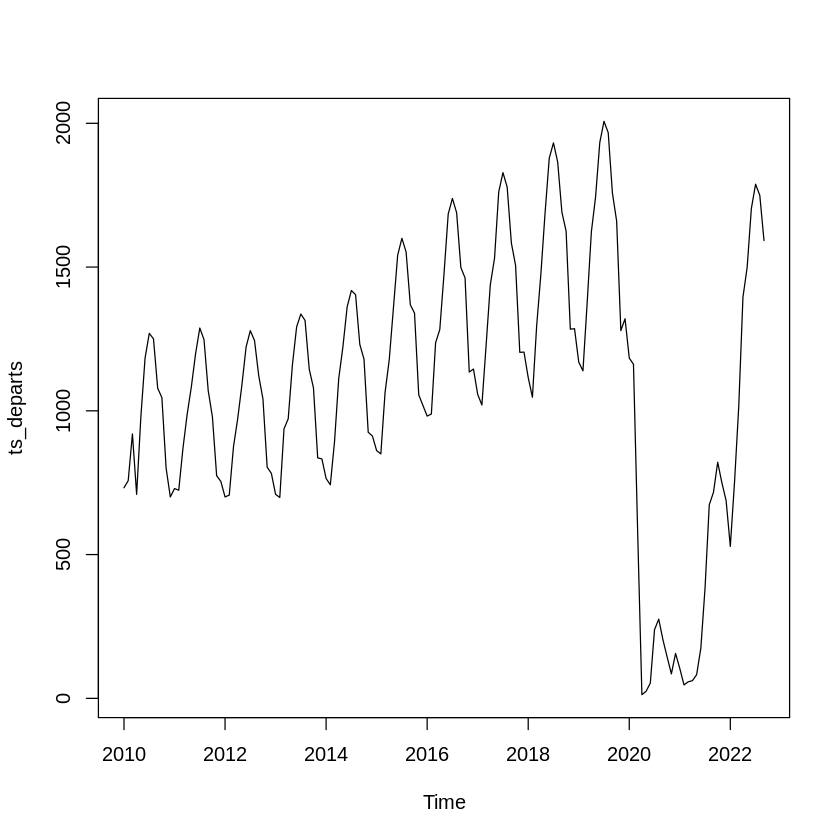

In [ ]:
plot(ts_departs)

# The chart shows 
1. pronounced, strong growth trend over years
2. Obvious seasonality, peaking in July each year and the summer months
3. Effect of the COVID pandemic collapse in demand from 

In [ ]:
adf.test(ts_departs,alternative='stationary',k=1)


	Augmented Dickey-Fuller Test

data:  ts_departs
Dickey-Fuller = -3.5595, Lag order = 1, p-value = 0.03934
alternative hypothesis: stationary


In [ ]:
adf.test(ts_departs,alternative='stationary',k=2)

Warning message in adf.test(ts_departs, alternative = "stationary", k = 2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_departs
Dickey-Fuller = -4.3966, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
adf.test(ts_departs,alternative='stationary',k=3)


	Augmented Dickey-Fuller Test

data:  ts_departs
Dickey-Fuller = -3.6679, Lag order = 3, p-value = 0.02942
alternative hypothesis: stationary


In [ ]:
adf.test(ts_departs,alternative='stationary',k=4)


	Augmented Dickey-Fuller Test

data:  ts_departs
Dickey-Fuller = -2.5621, Lag order = 4, p-value = 0.3421
alternative hypothesis: stationary


In [ ]:
adf.test(ts_departs,alternative='stationary',k=5)


	Augmented Dickey-Fuller Test

data:  ts_departs
Dickey-Fuller = -2.2493, Lag order = 5, p-value = 0.4725
alternative hypothesis: stationary


In [ ]:
install.packages('fpp2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’




In [ ]:
library('fpp2')

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.4.0     ✔ fma       2.4  
✔ forecast  8.19      ✔ expsmooth 2.3  




Attaching package: ‘fpp2’


The following object is masked _by_ ‘.GlobalEnv’:

    departures




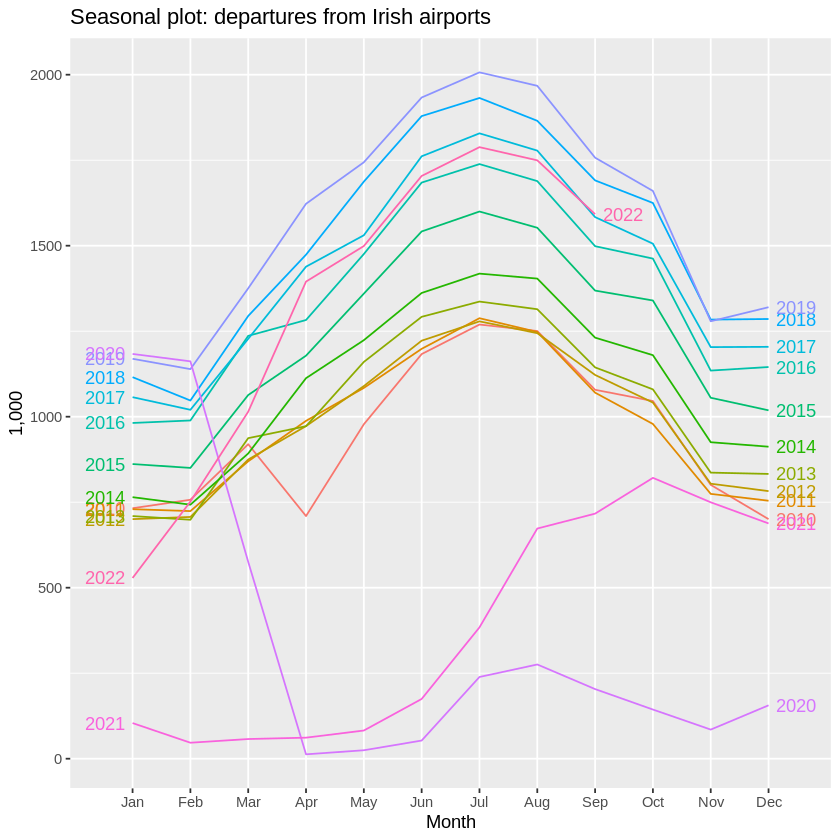

In [ ]:
ggseasonplot(ts_departs,year.labels=TRUE, year.labels.left=TRUE) + ylab('1,000') + ggtitle("Seasonal plot: departures from Irish airports")


Clear and consistent seaonality every year apart from the collapse
in 2020 and the progressive growth in 2021
Timing, with the collapse dating to February

Since the start and end of the COVID pandemic was extraordinary
with only one complete example to capture, we can remove it to
discover more generalisable analysis from the data

In [ ]:
ts_departs_filtered<-window(ts_departs, start = c(2010,1), end = c(2020,2))
ts_departs_filtered

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2
